<a href="https://colab.research.google.com/github/ayyucedemirbas/speech_emotion_classification_multi-head_self-attention/blob/main/emotion_attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"username","key":"key"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

In [2]:
!mkdir speech-emotion-recognition-en
%cd speech-emotion-recognition-en

/content/speech-emotion-recognition-en


In [3]:
!kaggle datasets download dmitrybabko/speech-emotion-recognition-en

Dataset URL: https://www.kaggle.com/datasets/dmitrybabko/speech-emotion-recognition-en
License(s): copyright-authors
 99% 978M/987M [00:13<00:00, 91.1MB/s]
100% 987M/987M [00:13<00:00, 74.3MB/s]


In [4]:
!unzip -qq speech-emotion-recognition-en.zip

In [5]:
%cd ..

/content


In [8]:
import os
import pathlib
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow import keras
import librosa
import plotly.express as px
from IPython import display
import IPython.display as ipd

In [9]:
my_data = "speech-emotion-recognition-en"

Crema_path = my_data + "/Crema/"
Ravdess_path = my_data + "/Ravdess/audio_speech_actors_01-24/"
Savee_path = my_data + "/Savee/"
Tess_path = my_data + "/Tess/"

In [11]:
import numpy as np

In [12]:
commands = np.array(tf.io.gfile.listdir(str(my_data)))
commands = commands[(commands != 'README.md') & (commands != '.DS_Store')]

print('Available Audio Commands:', commands)

Available Audio Commands: ['Savee' 'Ravdess' 'speech-emotion-recognition-en.zip' 'Crema' 'Tess']


In [13]:
def process_dataset(dataset_path):
    dataset_directory_list = os.listdir(dataset_path)

    file_emotion = []
    file_path = []

    for i in dataset_directory_list:

        if os.path.isfile(os.path.join(dataset_path, i)):
            filename = os.path.basename(i)
            part = filename.split('.')[0].split('_')

            if len(part) >= 3:
                try:
                    file_emotion.append(int(part[2]))
                    file_path.append(dataset_path + '/' + filename)
                except ValueError:

                    print(f"Skipping file {filename} due to invalid emotion label format.")
            else:

                print(f"Skipping file {filename} due to unexpected filename format.")

    return file_emotion, file_path

In [ ]:
crema_emotions, crema_paths = process_dataset(Crema_path)
ravdess_emotions, ravdess_paths = process_dataset(Ravdess_path)
savee_emotions, savee_paths = process_dataset(Savee_path)
tess_emotions, tess_paths = process_dataset(Tess_path)

file_emotion, file_path = crema_emotions, crema_paths

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis=1)
ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',8:'surprise'},inplace=True)

In [15]:
Crema_path = my_data + "/Crema/"
crema_directory_list = os.listdir(Crema_path)

file_emotion = []
file_path = []

In [17]:
for file in crema_directory_list:

    file_path.append(Crema_path + file)

    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

In [ ]:
file_emotion

In [19]:
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()
print(Crema_df.Emotions.value_counts())

Tess_path = my_data + "/Tess/"

tess_directory_list = os.listdir(Tess_path)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess_path + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess_path + dir + '/' + file)

Emotions
happy      1271
sad        1271
angry      1271
disgust    1271
fear       1271
neutral    1087
Name: count, dtype: int64


In [ ]:
file_path

In [ ]:
file_emotion

In [23]:
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()
print(Tess_df.Emotions.value_counts())

Savee_path = my_data + "/Savee/"

savee_directory_list = os.listdir(Savee_path)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee_path + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])


path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()
print(Savee_df.Emotions.value_counts())

data_path = pd.concat([ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

Emotions
happy       400
surprise    400
neutral     400
angry       400
fear        400
disgust     400
sad         400
Name: count, dtype: int64
Emotions
neutral     120
happy        60
sad          60
angry        60
surprise     60
disgust      60
fear         60
Name: count, dtype: int64


,Emotions,Path
0,happy,speech-emotion-recognition-en/Crema/1038_IEO_H...
1,happy,speech-emotion-recognition-en/Crema/1043_IWW_H...
2,sad,speech-emotion-recognition-en/Crema/1058_WSI_S...
3,neutral,speech-emotion-recognition-en/Crema/1025_TSI_N...
4,neutral,speech-emotion-recognition-en/Crema/1061_IWW_N...


In [24]:
data,sr = librosa.load(file_path[0])

In [27]:
import plotly.graph_objects as go

In [28]:
def create_log_mel_spectrogram_plotly(data, sr):

  spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128, fmax=8000)
  log_spectrogram = librosa.power_to_db(spectrogram)

  fig = go.Figure(data=go.Heatmap(
      z=log_spectrogram,
      x=np.linspace(0, len(data) / sr, num=log_spectrogram.shape[1]),
      y=librosa.mel_frequencies(n_mels=128, fmax=8000),
      colorscale='Viridis',
      colorbar=dict(title='dB')
  ))

  fig.update_layout(
      title='Log Mel Spectrogram',
      xaxis_title='Time (s)',
      yaxis_title='Frequency (Hz)',
      height=600,
      width=800
  )

  fig.show()


In [29]:
create_log_mel_spectrogram_plotly(data, sr)

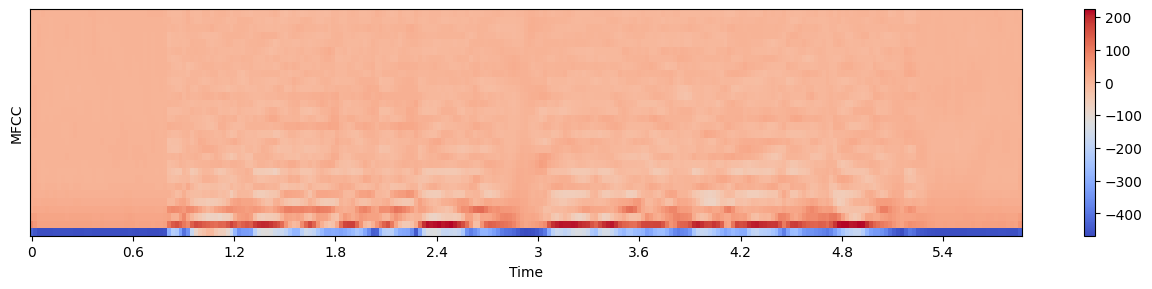

In [30]:
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)


# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(data,rate=sr)

In [31]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

In [32]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr) # Changed waveplot to waveshow
    plt.show()

def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

In [33]:
labels = {'disgust':0,'happy':1,'sad':2,'neutral':3,'fear':4,'angry':5}
Crema_df.replace({'Emotions':labels},inplace=True)

<ipython-input-33-5372901cec1b>:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [ ]:
Crema_df

In [56]:
emotion=4
path = np.array(Crema_df.Path[Crema_df.Emotions==emotion])[0]

In [48]:
path

'speech-emotion-recognition-en/Crema/1040_IEO_DIS_LO.wav'

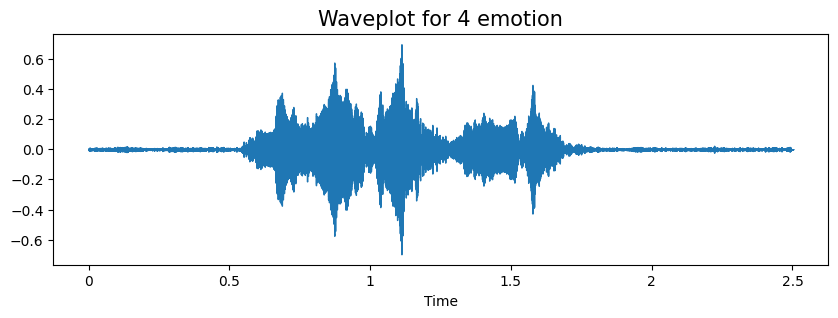

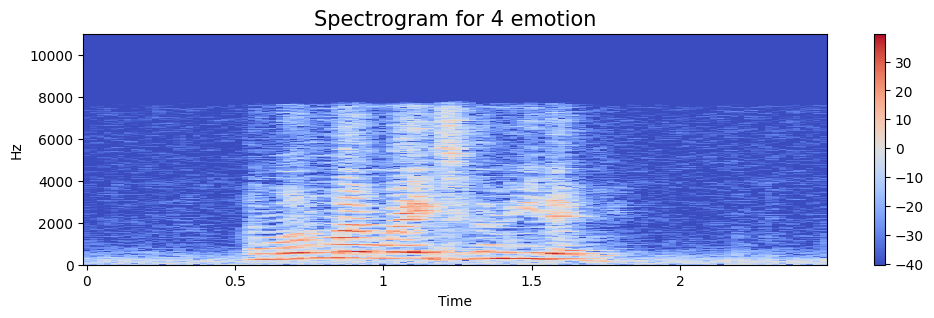

In [57]:
import IPython.display as ipyd

data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
ipyd.Audio(path) # Call Audio using the alias

In [58]:
num_mfcc=13
n_fft=2048
hop_length=512
SAMPLE_RATE = 22050
data = {
        "labels": [],
        "mfcc": []
    }
for i in range(7442):
    data['labels'].append(Crema_df.iloc[i,0])
    signal, sample_rate = librosa.load(Crema_df.iloc[i,1], sr=SAMPLE_RATE)
    mfcc = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=13, n_fft=2048, hop_length=512) # Call librosa.feature.mfcc with keyword arguments
    mfcc = mfcc.T
    data["mfcc"].append(np.asarray(mfcc))
    if i%500==0:
        print(i)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000


In [59]:
# Calculate the maximum length among all MFCCs
max_len = max(len(mfcc) for mfcc in data['mfcc'])

# Pad MFCCs with zeros to make them all the same length
for i, mfcc in enumerate(data['mfcc']):
    if len(mfcc) < max_len:
        pad_width = max_len - len(mfcc)
        data['mfcc'][i] = np.pad(mfcc, ((0, pad_width), (0, 0)), 'constant')

In [60]:
X = np.array(data['mfcc'])
y = np.array(data['labels'])
X = tf.keras.preprocessing.sequence.pad_sequences(X)
X.shape

(7442, 216, 13)

In [62]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

In [75]:
print(X_train.shape,y_train.shape,X_validation.shape,y_validation.shape,X_test.shape,y_test.shape)

(5357, 216, 13) (5357,) (1340, 216, 13) (1340,) (745, 216, 13) (745,)


In [65]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [90]:
def build_model_with_attention(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)


    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True))(inputs)

    attention_output = layers.MultiHeadAttention(num_heads=4, key_dim=64)(x, x)

    x = layers.Add()([x, attention_output])
    x = layers.LayerNormalization()(x)

    x = layers.GlobalAveragePooling1D()(x)

    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model


input_shape = (X_train.shape[1], X_train.shape[2])  # Timesteps, Features
num_classes = len(labels)


model = build_model_with_attention(input_shape, num_classes)
model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 216, 13)        │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_7           │ (None, 216, 256)       │        145,408 │ input_layer_7[0][0]    │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_1    │ (None, 216, 256)       │        263,168 │ bidirectional_7[0][0], │
│ (MultiHeadAttention)      │                        │                │ bidirectional_7[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 216, 256)       │              0 │ bidirectional_7[0][0], │
│                           │                        │                │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_1     │ (None, 216, 256)       │            512 │ add_1[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d… │ (None, 256)            │              0 │ layer_normalization_1… │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_19 (Dense)          │ (None, 64)             │         16,448 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_20 (Dense)          │ (None, 6)              │            390 │ dense_19[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 425,926 (1.62 MB)

 Trainable params: 425,926 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

In [91]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_validation, y_validation),
    epochs=20,
    batch_size=32
)

Epoch 1/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.3205 - loss: 1.6420 - val_accuracy: 0.4403 - val_loss: 1.3693
Epoch 2/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.4414 - loss: 1.3702 - val_accuracy: 0.4612 - val_loss: 1.3139
Epoch 3/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.4474 - loss: 1.3342 - val_accuracy: 0.4903 - val_loss: 1.3127
Epoch 4/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.4944 - loss: 1.2728 - val_accuracy: 0.4903 - val_loss: 1.2931
Epoch 5/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.5054 - loss: 1.2443 - val_accuracy: 0.5097 - val_loss: 1.2439
Epoch 6/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.5286 - loss: 1.2051 - val_accuracy: 0.5336 - val_loss: 1.1974
Epoch 7/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.5397 - loss: 1.1644 - val_accuracy: 0.5149 - val_loss: 1.2315
Epoch 8/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.5508 - loss: 1.1683 - val

In [92]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5790 - loss: 1.0833
Test Loss: 1.0982385873794556, Test Accuracy: 0.5812080502510071


In [93]:
y_pred = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()
print(classification_report(y_test, y_pred_classes))

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step
              precision    recall  f1-score   support

           0       0.60      0.50      0.54       142
           1       0.58      0.31      0.40       109
           2       0.62      0.59      0.61       138
           3       0.48      0.77      0.59       113
           4       0.47      0.52      0.49       121
           5       0.80      0.79      0.79       122

    accuracy                           0.58       745
   macro avg       0.59      0.58      0.57       745
weighted avg       0.59      0.58      0.58       745



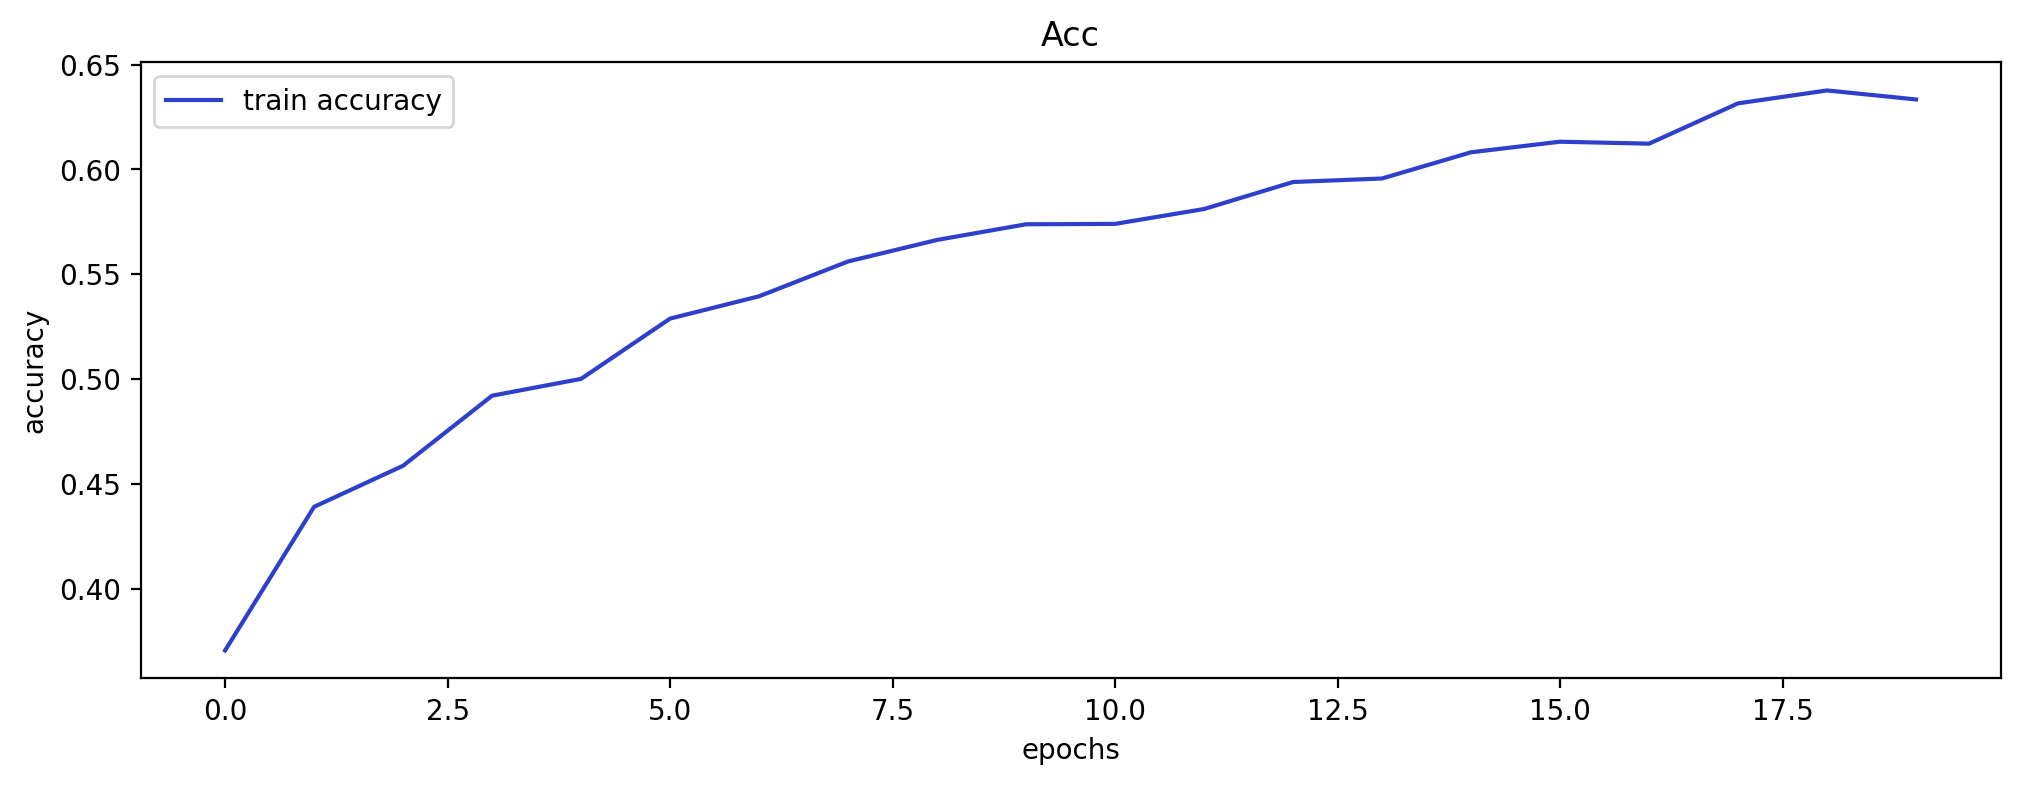

In [94]:
epochs = list(range(20))
acc = history.history['accuracy']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(epochs, acc, label='train accuracy', color='#2E40CB')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Acc')
plt.legend()
plt.show()

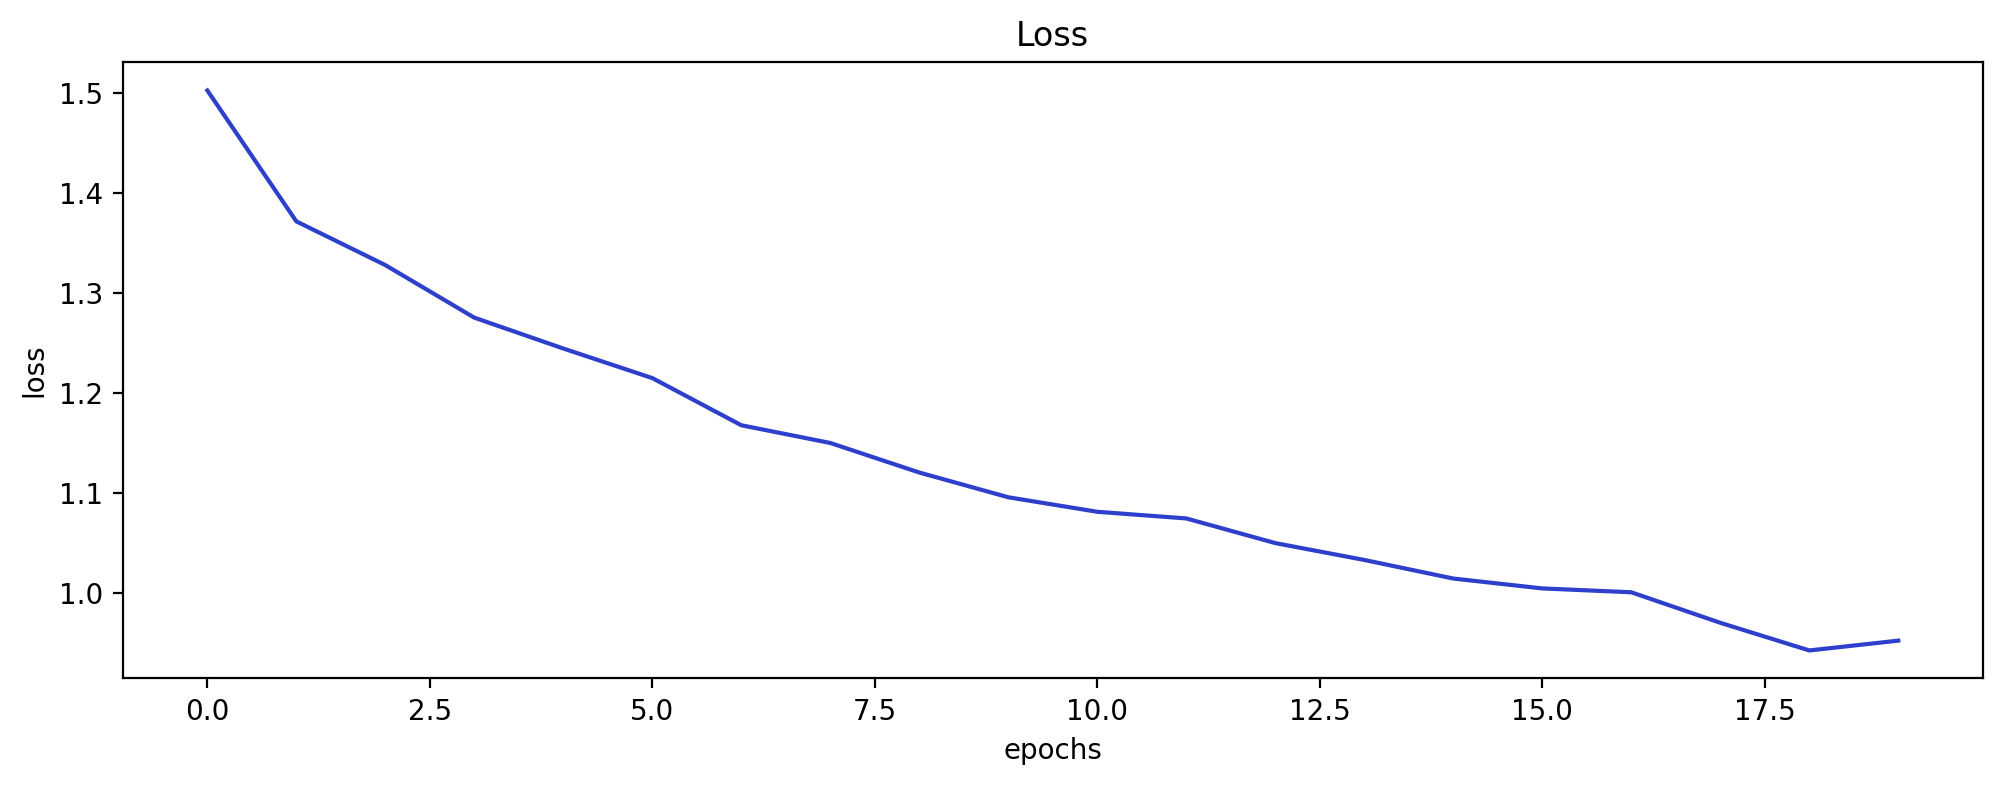

In [95]:
loss = history.history['loss']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(epochs, loss, label='train loss', color='#2E40CB')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss')
plt.show()